In [2]:
!pip install emoji

     |████████████████████████████████| 51kB 1.5MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=65ae2451f03be053a44a6f0f8ed5384b9a8c46a8ee8cee3739730b8587b69c60
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [66]:
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import WordNetLemmatizer
from spacy.lang.en import English 
from collections import Counter
import matplotlib.pyplot as plt
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en import English
from textblob import TextBlob as tb
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import string
import csv
#import langid
import emoji
import spacy
import json
import nltk
import re

nlp = spacy.load("en_core_web_sm")


In [67]:
#BERT Pre-trained
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, LoggingHandler
import numpy as np
import logging

#### Just some code to print debug information to stdout
np.set_printoptions(threshold=100)

logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO,
                    handlers=[LoggingHandler()])

# Load Sentence model (based on BERT) from URL
model = SentenceTransformer('distiluse-base-multilingual-cased')

Requirement already up-to-date: sentence-transformers in /usr/local/lib/python3.6/dist-packages (0.3.7.2)
2020-10-05 15:05:19 - Load pretrained SentenceTransformer: distiluse-base-multilingual-cased
2020-10-05 15:05:19 - Did not find folder distiluse-base-multilingual-cased. Assume to download model from server.
2020-10-05 15:05:19 - Load SentenceTransformer from folder: /root/.cache/torch/sentence_transformers/sbert.net_models_distiluse-base-multilingual-cased
2020-10-05 15:05:23 - Use pytorch device: cpu


In [68]:
dataset = pd.read_csv('tweets_df.csv')
dataset = dataset.sample(frac=1)
texts=dataset['tweet'].to_list()
dataset


,tweet,class
535,@MrRussert @chucktodd @BernieSanders My Great-...,1
791,🚐 RT This: #MAGA The issue of kikes in the nea...,4
375,Looks like an incurable case of TDS to me. Poo...,1
199,Gantz doesn’t want a government serving Jews a...,1
544,#YuvaratnaaDialogueTeaser \nReal Time Views Up...,1
...,...,...
543,Jews living or visiting #Europe feel the need ...,1
910,"The group also accuses ALL Jews of corruption,...",1
704,If the story was:\n\nJews (or Christians) are ...,1
807,Ilhan faced as much hate from zionazis in her ...,5


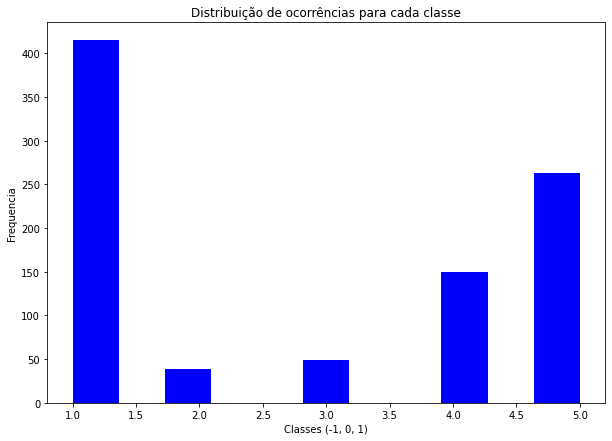

1    415
5    263
4    150
3     49
2     39
Name: class, dtype: int64

In [69]:
plt.figure(figsize = (10, 7)) 
x = dataset['class'] 
plt.hist(x, bins = 'auto', color = "blue") 
plt.title('Distribuição de ocorrências para cada classe')
plt.ylabel('Frequencia')
plt.xlabel('Classes (-1, 0, 1)')
plt.show()
#-----------------------------------------------------------
dataset['class'].value_counts()

In [90]:
df_lematized = [] # Armazena a lista de itens normalizados
sent_score = [] # Lista vazia para armazenar scores de sentimentos

#Reading the list of aspects 
with open('holocaust_lexicon.txt') as f:
    holocaust = f.read().lower().splitlines()

#Create the column for part of speech frequency analysis
COLUNAS = [
        'NOUN'
        'ADJ',
        #'ADP',
        'ADV',
        #'AUX',
        #'CONJ',
        #'DET',
        #'INTJ',
        #'NUM',
        #'PART',
        #'PRON',
        #'PROPN',
        #'PUNCT',
        'CCONJ',
        #'SCONJ',
        #'SYM',
        'VERB',
        #'SPACE',
        #'X'
    ]
df_partofspeech = pd.DataFrame(columns=COLUNAS)

#Create the column for holocaust frequency analysis
COLUNAS_1 = [
        'HOLOC',
            ]

df_holocaust = pd.DataFrame(columns=COLUNAS_1)

#functions
def give_emoji_free_text(text):
	allchars = [str for str in text]
	emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
	clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
	return clean_text

for texts in dataset['tweet']:
  texts = texts.lower() 
  texts = texts.lstrip()
  texts = texts.replace(r"(http|@)\S+", "")
  texts = re.sub(r'http\S+', '', texts)
  texts = texts.replace(r"[^a-z\':_]", "")
  texts = texts.replace(r"(can't|cannot)", 'can not')
  texts = texts.replace(r"n't", ' not')
  texts = give_emoji_free_text(texts)
  texts = re.sub('@[^\s]+','',texts) #remove usernames
  texts = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", texts).split())
  texts = texts.replace(r'#அன்புள்ளசூர்யா', "")
  texts = texts.replace(r'「黒豚、ユダ豚、イタ豚を、俺は見下さん すべて平等に価値がない！」', "")
  texts = texts.replace(r'3⃣', "")
  texts = texts.replace(r'#⃣', "")
  texts = texts.replace(r'7⃣', "")
  texts = texts.replace(r'6⃣', "")
  texts = texts.replace(r'6⃣', "")
  texts = texts.replace(r'1⃣', "")
  texts = texts.replace(r'0⃣', "")
  texts = texts.replace(r'♡', "")
  texts = texts.replace(r'9⃣', "")
  texts = texts.replace(r'4⃣', "")
  texts = texts.replace(r'&', "")
  texts = texts.replace(r'*', "")
  texts = texts.replace(r'[', "")
  texts = texts.replace(r']', "")
  texts = texts.replace(r"::", ": :")
  texts = texts.replace(r"’", "")
  texts = texts.replace(r"|", "")
  texts = texts.replace(r"/", "")
  texts = texts.replace(r"", "")
  texts = texts.replace(r"", "")
  texts = texts.replace(r"'", "")
  texts = texts.replace(r"*", "")
  texts = texts.replace(r"!", "")
  texts = texts.replace(r"?", "")
  texts = texts.replace(r"«", "")
  texts = texts.replace(r"»", "")
  texts = texts.replace(r"(", "")
  texts = texts.replace(r"‘", "")
  texts = texts.replace(r"“", "")
  texts = texts.replace(r"”", "")
  texts = texts.replace(r"“", "")
  texts = texts.replace(r";", "") 
  texts = texts.replace(r",", "")
  texts = texts.replace(r'"', "")
  texts = texts.replace(r':', "")
  texts = texts.replace(r'&', "")
  texts = texts.replace(r")", "")
  texts = texts.replace(r'¿', "")
  texts = texts.replace(r'...', "")
  texts = texts.replace(r'=', "")
  texts = texts.replace(r'-', "")
  texts = texts.replace(r'—', "")
  texts = texts.replace(r'+', "")
  texts = texts.replace(r'.', "")

  #Twitter classification
  analysis = None
  analysis = tb(texts)
  polarity = analysis.sentiment.polarity
  sent_score.append(polarity)
  
  #Spacy Library
  doc = nlp(texts)

  count_dict = {
        'ADJ': int(0),
        #'ADP': int(0),
        'ADV': int(0),
        #'AUX': int(0),
        #'CONJ': int(0),
        #'DET': int(0),
        #'INTJ': int(0),
        #'NUM': int(0),
        #'PART': int(0),
        #'PRON': int(0),
        #'PROPN': int(0),
        #'PUNCT': int(0),
        'CCONJ': int(0),
        #'SCONJ': int(0),
        #'SYM' : int(0),
        'VERB' : int(0),
        #'SPACE' : int(0),
        'NOUN' : int(0),
        #'X' : int(0)  
    }
    

  for token in doc:
    #Check part-of-speech 
    if token.pos_ in count_dict.keys():
      count_dict[token.pos_] = count_dict[token.pos_] + 1
 
    #Check Holocaust Lexicon 
    for it_holo in holocaust:
      if token.lemma_ == it_holo:
         count_dict_1[token.lemma_] = count_dict_1[token.lemma_] + 1 

  # Insert new row to partofspeech dataframe
  df_partofspeech = df_partofspeech.append(count_dict, ignore_index=True)
  # Insert new row to holocaust dataframe
  df_holocaust = df_holocaust.append(count_dict_1, ignore_index=True)  


#Atualiza o vetor de twitter com a versão normalizada  
  df_lematized.append(texts)
dataset['tweet'] = df_lematized
#print(dataset['tweet'] )

#Create the dataframe for sentiment score
df_sent = pd.DataFrame(data=sent_score)
#df_sent.columns = ['SENT']

#Create the dataframe for holocaust score
df_holoc = pd.DataFrame(data=df_holocaust)
df_holoc.columns['HOLOC']

KeyError: ignored

In [71]:
#Pre-processing using the BERT embeddings
dataset['embedding'] = list(model.encode(dataset['tweet'].to_list()))

In [78]:
#Get the features using the Bert Embedding
features_bert = np.array(dataset['embedding'].to_list())
df_features = pd.DataFrame(data=features_bert, index=None, columns=None)

#Insert the Score Sentiment column
df_features['sent'] = df_sent['sent']

df_features = pd.concat([df_features, df_partofspeech, df_holoc], axis=1)
#axis = 0 ou axis = 1 define se vc quer juntar os dataframes por linha (igual o append) ou por coluna

#Insert the class column
df_features['class'] = dataset['class']

In [79]:
#Separating features and class
X = df_features.iloc[:, :-1]
Y = df_features.iloc[:,-1]
print('---------------------------(features)-------------------------------')
print(X)
print('---------------------------(class)----------------------------------')
print(Y)

---------------------------(features)-------------------------------
            0         1         2         3  ...  SCONJ  VERB  NOUN  holoc
0   -0.001342  0.047095  0.011554 -0.015507  ...      0     1   5.0     21
1   -0.015624 -0.027336  0.022726  0.020772  ...      0     0   4.0     18
2   -0.016507  0.012304 -0.008938 -0.007753  ...      1     8   7.0     31
3    0.006102  0.022479  0.032990 -0.006666  ...      0     6   2.0     57
4    0.003250  0.053030 -0.016706  0.022350  ...      0     1   5.0      0
..        ...       ...       ...       ...  ...    ...   ...   ...    ...
911 -0.027590  0.071298  0.038307 -0.038175  ...      0     5   6.0     26
912 -0.010234  0.027000  0.025385 -0.076390  ...      1     8  12.0    116
913 -0.043198  0.063013 -0.020937 -0.027936  ...      1     4   7.0     68
914  0.034999  0.056797  0.055051 -0.036932  ...      3     4   6.0     77
915 -0.046636 -0.028576  0.001148 -0.011114  ...      0     2   2.0      0

[916 rows x 528 columns]
-----

In [80]:
#Separating test and training data
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Cross-validation
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.442484 (0.043467)
LDA: 0.234950 (0.035948)
KNN: 0.390744 (0.062633)
CART: 0.325120 (0.053183)
NB: 0.292373 (0.050541)
SVM: 0.453425 (0.060390)


In [36]:
#MLP classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

def model_tester(inputs, target):
  clf = MLPClassifier(hidden_layer_sizes=(5,), random_state=42, max_iter=10000)
  scores = cross_val_score(clf, inputs, target, cv=10)
  print("Score do classificador: %.2f" % (scores.mean()*100))

#Score
model_tester(X, Y)

Score do classificador: 36.79
